In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.decomposition as de
de.__all__

['DictionaryLearning',
 'FastICA',
 'IncrementalPCA',
 'KernelPCA',
 'MiniBatchDictionaryLearning',
 'MiniBatchNMF',
 'MiniBatchSparsePCA',
 'NMF',
 'PCA',
 'SparseCoder',
 'SparsePCA',
 'dict_learning',
 'dict_learning_online',
 'fastica',
 'non_negative_factorization',
 'randomized_svd',
 'sparse_encode',
 'FactorAnalysis',
 'TruncatedSVD',
 'LatentDirichletAllocation']

In [18]:
# 准备数据
xigua = pd.read_csv("../data/xigua3.0.csv")
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data2 = encoder.fit_transform(xigua[[ '色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '好瓜']])
data3 = pd.concat([pd.DataFrame(data2, columns=['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '好瓜']), xigua[['密度', '含糖率']]], axis=1)
data3

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜,密度,含糖率
0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.697,0.460
1,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.774,0.376
2,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.634,0.264
3,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.608,0.318
4,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.556,0.215
5,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.403,0.237
6,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.481,0.149
7,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.437,0.211
8,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.666,0.091
9,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.243,0.267


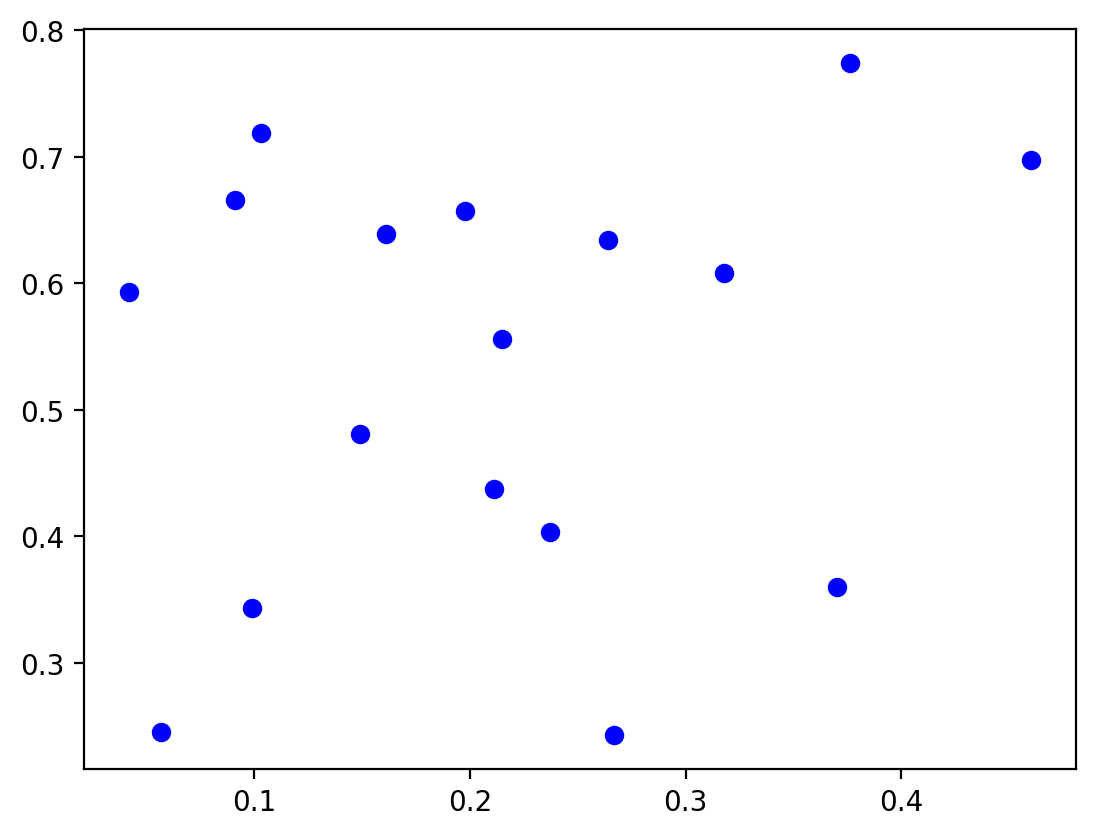

In [19]:
plt.figure(dpi=200)
plt.scatter(data3.iloc[:,-1], data3.iloc[:,-2], c='blue')
plt.show()

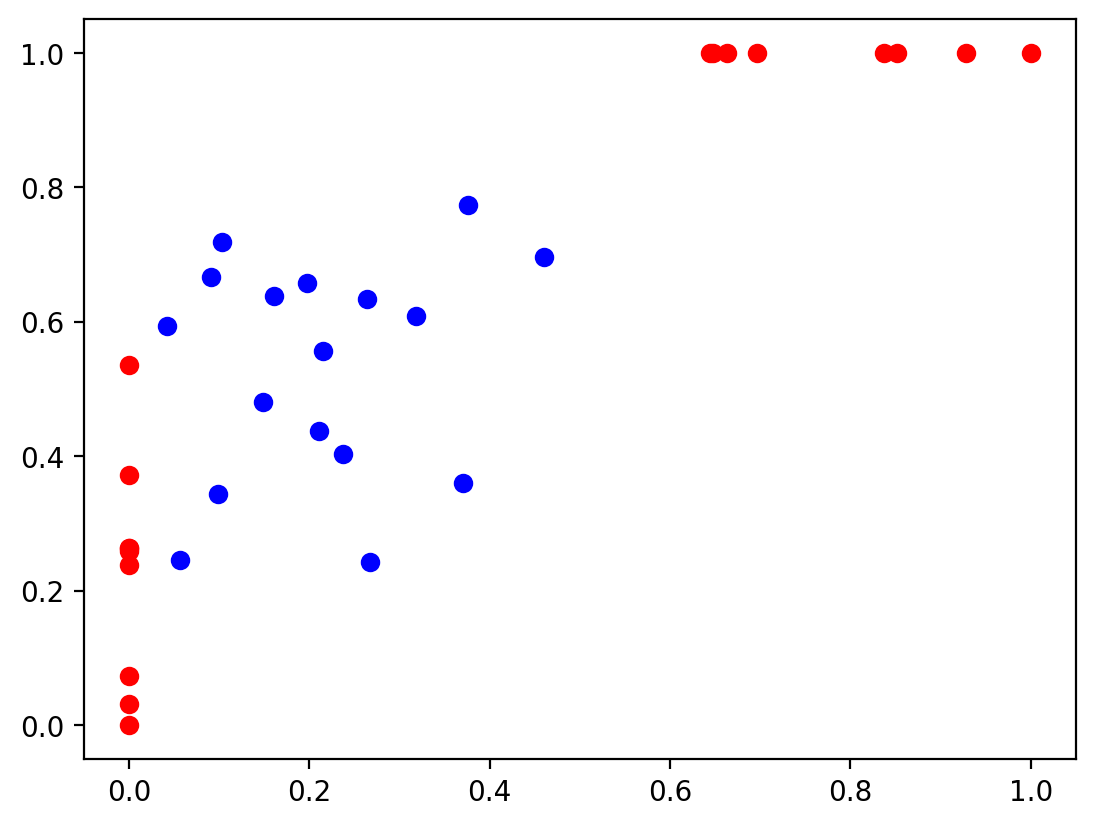

In [24]:
from sklearn.decomposition import DictionaryLearning
model = DictionaryLearning(n_components=2)
data3_trans = model.fit_transform(data3)
data3_trans_pd = pd.DataFrame(data3_trans)
data3_trans_pd = (data3_trans_pd - data3_trans_pd.min())/(data3_trans_pd.max()-data3_trans_pd.min())
plt.figure(dpi=200)
plt.scatter(data3.iloc[:,-1], data3.iloc[:,-2], c='blue')
plt.scatter(data3_trans_pd.iloc[:,0], data3_trans_pd.iloc[:,1], c='red')
plt.show()

In [25]:
data3_trans

array([[ 3.33611556,  0.        ],
       [ 2.15911559,  0.        ],
       [ 2.32424026,  0.        ],
       [ 3.09509519,  0.        ],
       [ 2.7915655 ,  0.        ],
       [ 0.        , -3.40408455],
       [ 0.        , -3.25725457],
       [ 0.        , -2.60174897],
       [ 0.        , -2.58939289],
       [ 0.        , -2.58973746],
       [ 0.        , -1.63169061],
       [ 0.        , -2.20450385],
       [ 2.83998294,  0.        ],
       [ 2.15014   ,  0.        ],
       [ 0.        , -2.67742256],
       [ 2.21247358,  0.        ],
       [ 0.        , -3.51362158]])

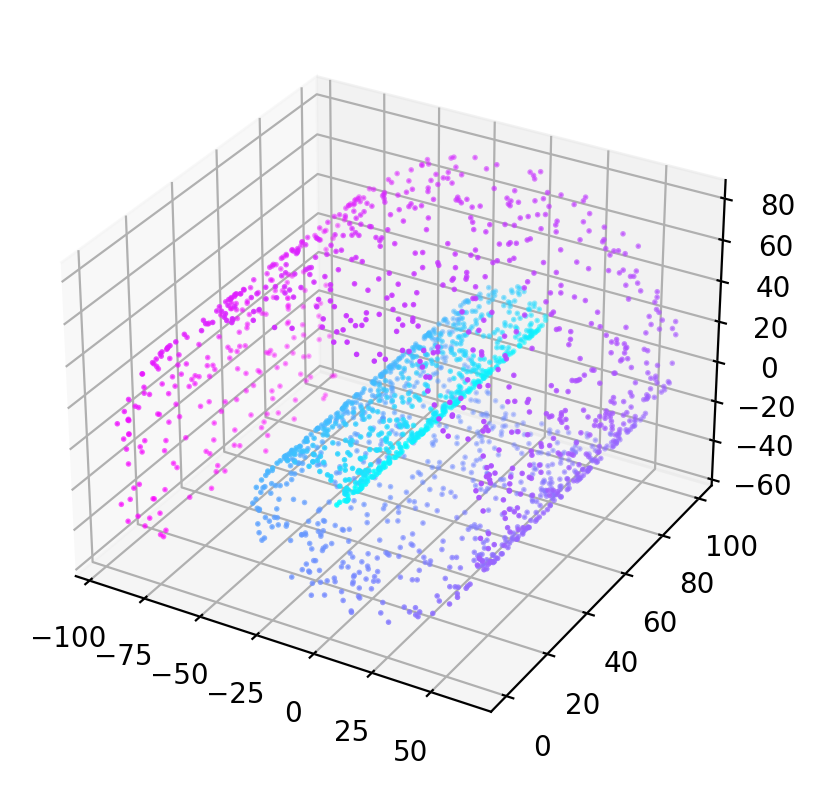

In [28]:
import math
sample_n = 2000
sample_scale = 100
draw_scale = 10
np.random.seed(1234)
import random
random.seed(1234)
plt.rcParams['figure.dpi'] = 200

class MyData:
    def __repr__(self):
        return str(self.__dict__).replace(", '", ",\n'")

d = MyData()

def trans_spiral(angle):
    x = angle * math.cos(angle / draw_scale)
    y = angle * math.sin(angle / draw_scale)
    return x, y

d.ang = sample_scale * np.random.rand(sample_n)
d.xy = np.array([trans_spiral(ang) for ang in d.ang])
d.target = d.ang
d.xy_pre = sample_scale * np.random.rand(sample_n, 2)
d.y = d.xy_pre[:, 0]
d.xz = np.array([trans_spiral(ang) for ang in d.xy_pre[:, 1]])
d.target = d.xy_pre[:, 1]
d.xyz = np.vstack((d.xz[:, 0], d.y, d.xz[:, 1])).transpose()
ax = plt.axes(projection='3d')
ax.scatter(d.xyz[:, 0], d.xyz[:, 1], d.xyz[:, 2], c=d.target, cmap='cool', s=1)
plt.show()

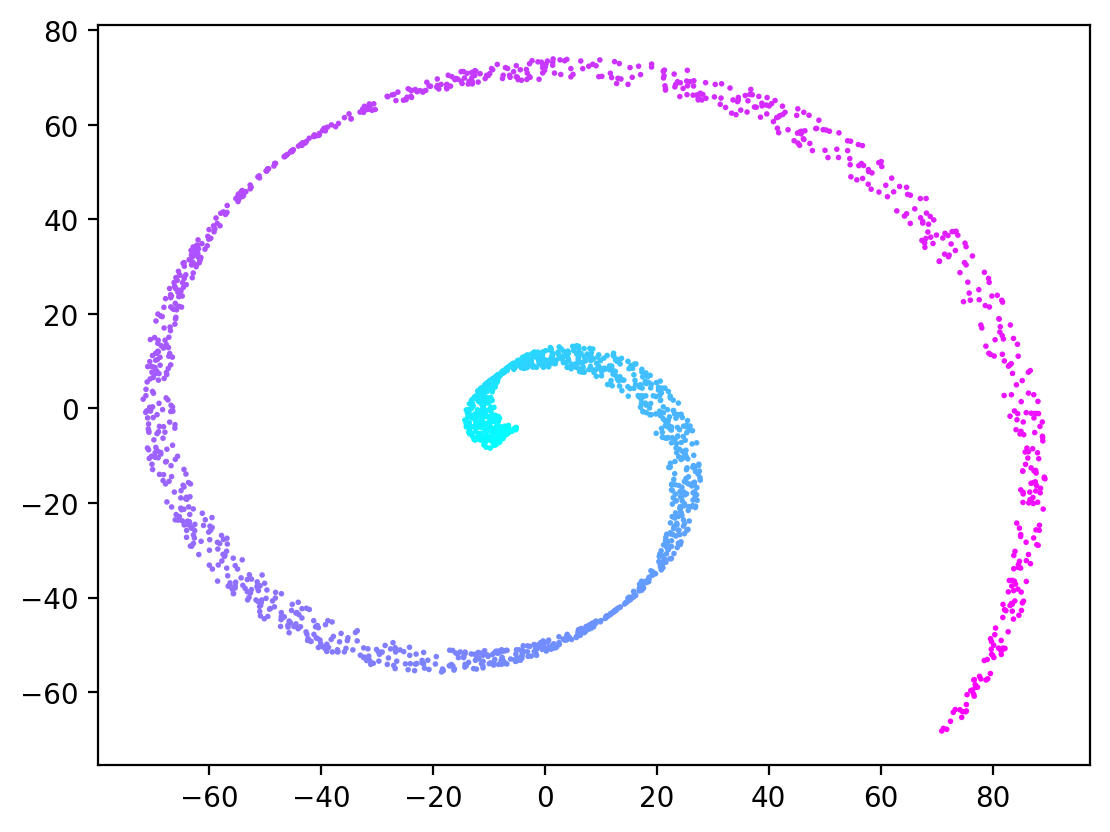

In [30]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
d.result = model.fit_transform(d.xyz)
ax = plt.axes()
ax.scatter(d.result[:, 0], d.result[:, 1], c=d.target, cmap='cool', s=1)
plt.show()

In [32]:
d.result

array([[-51.03652532,  49.20837614],
       [ 19.19760239, -34.70357601],
       [-28.06083525,  65.93673027],
       ...,
       [ 23.09525463, -24.94110249],
       [  1.68125437, -50.47041575],
       [ -9.37548564,  -5.19317875]])

In [31]:
pca_inverse = model.inverse_transform(d.result)
pca_inverse

array([[ 49.35583584,  50.85054097,  51.09525844],
       [-28.54750985,  51.0432634 , -25.74925989],
       [ 28.12196133,  48.89869801,  69.88443215],
       ...,
       [-31.48342012,  50.39632979, -15.67654973],
       [-12.64903073,  52.66875518, -43.07010923],
       [  2.70041092,  51.17589533,   0.91222473]])

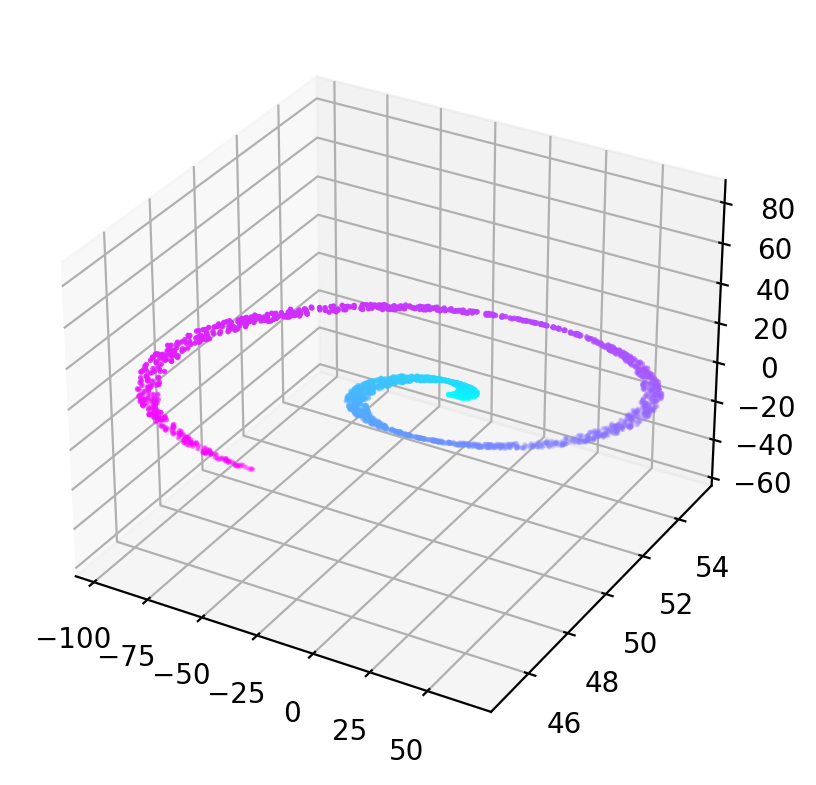

In [33]:
ax = plt.axes(projection='3d')
ax.scatter(pca_inverse[:, 0], pca_inverse[:, 1], pca_inverse[:, 2], c=d.target, cmap='cool', s=1)
plt.show()

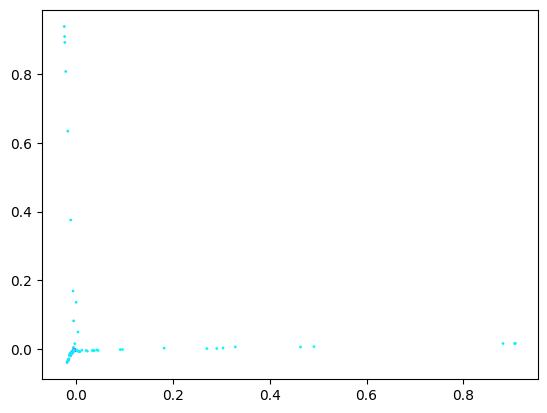

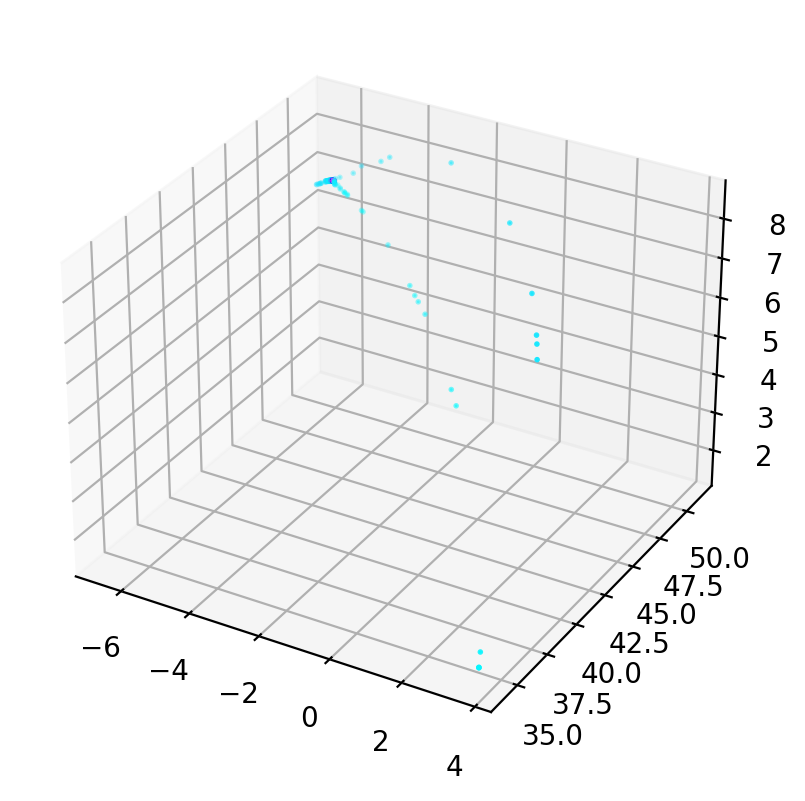

In [46]:
from sklearn.decomposition import KernelPCA
model = KernelPCA(n_components=2,
                  kernel='rbf',
                  fit_inverse_transform=True)
plt.rcParams['figure.dpi']=100
d.result = model.fit_transform(d.xyz)
ax = plt.axes()
ax.scatter(d.result[:, 0], d.result[:, 1], c=d.target, cmap='cool', s=1)
plt.show()
plt.rcParams['figure.dpi']=200
pca_inverse = model.inverse_transform(d.result)
ax = plt.axes(projection='3d')
ax.scatter(pca_inverse[:, 0], pca_inverse[:, 1], pca_inverse[:, 2], c=d.target, cmap='cool', s=1)
plt.show()

In [ ]:
pca_inverse

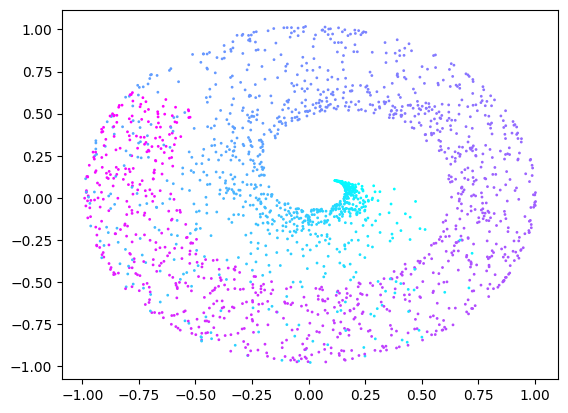

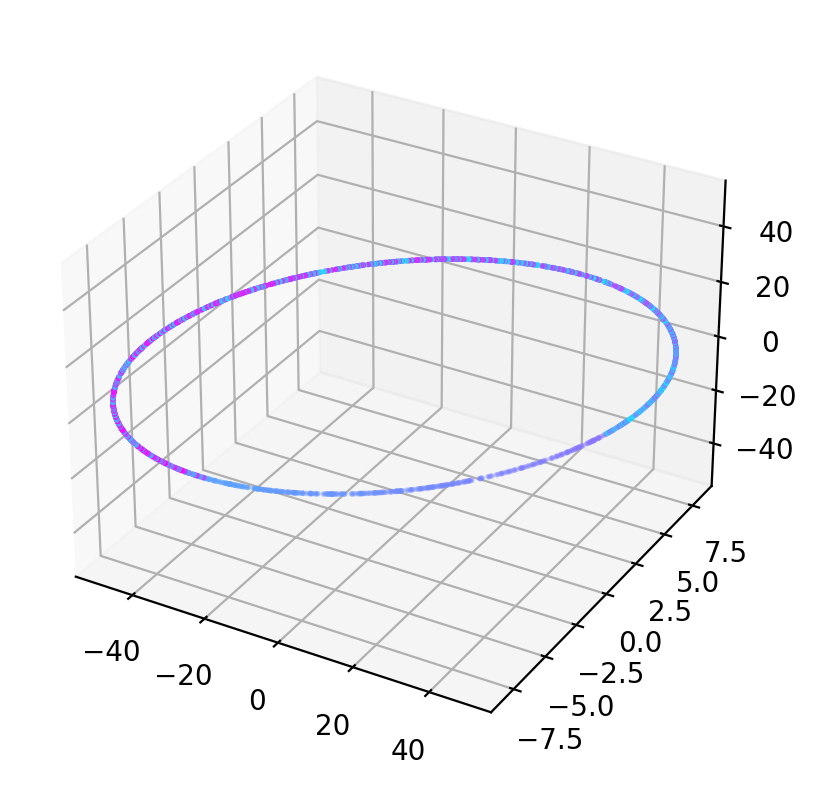

In [44]:
from sklearn.decomposition import KernelPCA
model = KernelPCA(n_components=2,
                  kernel='cosine',
                  fit_inverse_transform=True)
plt.rcParams['figure.dpi']=100
d.result = model.fit_transform(d.xyz)
ax = plt.axes()
ax.scatter(d.result[:, 0], d.result[:, 1], c=d.target, cmap='cool', s=1)
plt.show()
plt.rcParams['figure.dpi']=200
pca_inverse = model.inverse_transform(d.result)
ax = plt.axes(projection='3d')
ax.scatter(pca_inverse[:, 0], pca_inverse[:, 1], pca_inverse[:, 2], c=d.target, cmap='cool', s=1)
plt.show()